<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Challenge" data-toc-modified-id="The-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Challenge</a></span><ul class="toc-item"><li><span><a href="#Fixed-Assumptions" data-toc-modified-id="Fixed-Assumptions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fixed Assumptions</a></span></li></ul></li><li><span><a href="#Model-Development:-Object-Detection" data-toc-modified-id="Model-Development:-Object-Detection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Development: Object Detection</a></span></li><li><span><a href="#Model-Validation:-Objection-Detection" data-toc-modified-id="Model-Validation:-Objection-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Validation: Objection Detection</a></span></li><li><span><a href="#Controller-Design-and-Validation:-Gate-with-Detector" data-toc-modified-id="Controller-Design-and-Validation:-Gate-with-Detector-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Controller Design and Validation: Gate with Detector</a></span><ul class="toc-item"><li><span><a href="#State-Transition-Diagram" data-toc-modified-id="State-Transition-Diagram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>State Transition Diagram</a></span></li><li><span><a href="#State-Transition-Table" data-toc-modified-id="State-Transition-Table-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>State Transition Table</a></span></li><li><span><a href="#FSM-Arduino-Code" data-toc-modified-id="FSM-Arduino-Code-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>FSM Arduino Code</a></span></li><li><span><a href="#FSM-Video" data-toc-modified-id="FSM-Video-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>FSM Video</a></span></li></ul></li><li><span><a href="#Controller-Design-and-Validation:-Velocity-Control" data-toc-modified-id="Controller-Design-and-Validation:-Velocity-Control-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Controller Design and Validation: Velocity Control</a></span><ul class="toc-item"><li><span><a href="#Velocity-Control-Arduino-Code" data-toc-modified-id="Velocity-Control-Arduino-Code-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Velocity Control Arduino Code</a></span></li><li><span><a href="#Velocity-Control-Video" data-toc-modified-id="Velocity-Control-Video-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Velocity Control Video</a></span></li></ul></li></ul></div>

## The Challenge

You have learned a lot of FSM design tools and skills and this challenge will require you implement everything you have learned to date to generate a more advanced control system for the zumo gate.  This new control system will make use of the LED and Photodiode detector built into your gate base to detect objects.  
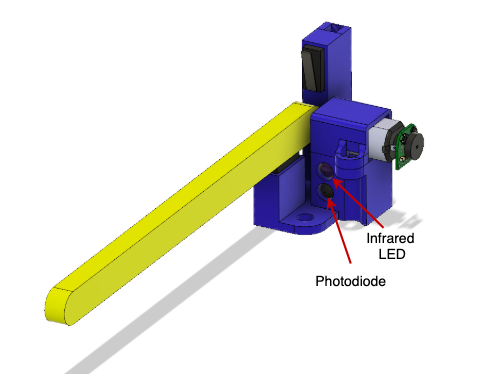








### Fixed Assumptions

* The momentary button will be used as a manual gate activation signal (to take the place of the floor sensor). The gate will begin in a default position of "closed." One [button press](../Week01_Friday/Week01_Friday_Reading.ipynb#Example) of BUTTON 1 will cause the gate to raise the gate and be open for 2 seconds, then lower automatically.  
* If an object is detected in the path of the gate by the photodiode as the gate is lowering, it will reverse and go to the fully up position.  The gate will remain open for 2 seconds before lowering again, but only if the object blocking the gate is no longer present.  Only objects that will be hit by the gate were it to reach the fully down position should cause the gate to rise.
* If the object continues to be detected after 3 attempts to close, the gate will raise, the LCD will display "FAULT" and the nothing will happen until the system is manually reset.
* To protect the motor, the motor will stop running when the gate arm is fully down or fully up.

## Model Development: Object Detection

In order to detect an object in the gate arm's path, you will use a combination of an infrared (IR) LED and a photodiode. 
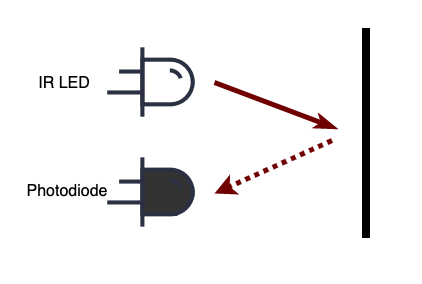
The IR LED is like the green LED on your workstation that illuminates when you apply power.  In this case the light produced is not visible as it is in the Infrared (IR) spectrum.  But how does and LED work?  [Similar to transistors](../Lab_1/Lab_1.ipynb#Model-Development:-Transistor-Model),  a light emitting diode uses semiconductors but is actually a bit simpler than a transistor.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BH9LI973H8w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We'll use the IR LED as a source to illuminate an object nearby and a photodetector to capture and light reflected by back from the object.  They work almost the same as and LED, just in reverse.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/SyZ3s45StaM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The symbols for LEDs and Photodiodes are similar as well.  The direction of the arrows, indicating the light either being emitted or absorbed, makes the distinction.

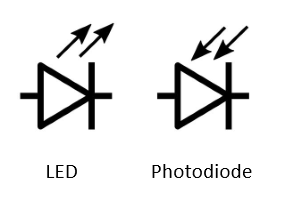


Below is a schematic of the the circuit that is connected to the IR LED and Photodiode installed in your gate module.  **You don't need to create this circuit.  It is already part of your printed circuit board**.  Note that as the light reaching the photodiode increases, more current is allowed to flow "backwards" through the diode. With more current through the 10K resistor, the measured voltage difference across it will increase.  The voltage difference can be measured by the arduino using its **analog in** capability.

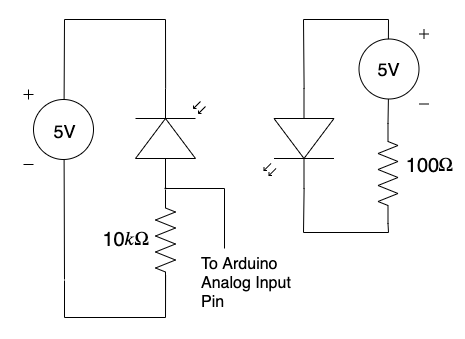

Using the [hardware resource pinout](../Week02_Implementation_Resources/Week02_Hardware_resource.ipynb#Arduino-Mega-Pin-Mapping-for-ME480-Workstation), identify the pin for IR Detector 1.  You'll use that pin to  measure the voltage difference generated by the photodiode.

Write an arduino program to read the voltage from the photodiode and output the measured voltage to the serial monitor.  Move an object (your hand or your zumo) closer and further from the sensor and see the range of values.  Review the use of <a href="../Week02_Implementation_Resources/Week02_Arduino_Resource.ipynb#Using-the-Serial-Monitor-and-Serial.Print()-Commands" data-toc-modified-id="Using-the-Serial-Monitor-and-Serial.Print()-Commands-1.5">Serial Print</a> and capturing data with Realterm in the Arduino Resource notebook.

For quick real-time observation of the behavior, you can show the serial output on the Serial Plotter.  The plotter is found in the *TOOLS* menu of the Arduino software right next to the Serial Monitor.  In order to use the plotter, you must format your data to print in columns by printing spaces or tabs in between each number and using [Serial.println()](https://www.arduino.cc/reference/en/language/functions/communication/serial/println/) to create a new line after each "moment" in time.

## Model Validation: Objection Detection

**Capture a data set which shows the highest voltage the photodiode can return and the voltage that it returns when an object is at the edge of the region of interest (about a gate blade's length).  Use the OCTAVE cell below to plot the data.  OCTAVE was designed to be similar to MATLAB, so you can use standard MATLAB commands to define a vector, cut/paste the data from the serial monitor into that vector and then generate a plot.  Indicate on your plot, or in the code output using the `disp()` function, the measured value for each of the two positions you tested and the threshold value you select to allow a boolean variable to represent when something IS or IS NOT below the gate.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Put your code in the cell below using the format characters provided in the template.**
```c++
void setup(){
    //hello
}

void loop(){
    //world
}

```

YOUR ANSWER HERE

## Controller Design and Validation: Gate with Detector

Using the validated model of your emitter/detector, design, implement and test a controller that meets the design criteria described in the fixed assumptions of the challenge.

You will need to implement timers in your FSM to meet this challenge.  Complete the [exercise on timers from the Week 2 Monday notebook](../Week02_Monday/Week2_Monday.ipynb#Controller-Design-and-Validation:-Timers) to assess your understanding and resolve any issues before you try to implement in a full design. Show your working code for this exercise below. **Properly format your code for display** as above.

YOUR ANSWER HERE

You will also need counters in your FSM for this challenge.  Complete the [exercise on counters from the Week 2 Monday notebook](../Week02_Monday/Week2_Monday.ipynb#Controller-Design-and-Validation:-Counters) to assess your understanding and resolve any issues before you try to implement in a full design. Show your working code for this exercise below. **Properly format your code for display** as above.

YOUR ANSWER HERE

Now you are ready to incorporate these elements into the design of the gate controller! Present your design for the gate controller below.

### State Transition Diagram


YOUR ANSWER HERE

### State Transition Table

YOUR ANSWER HERE

### FSM Arduino Code

**Include in the cell below a copy of your completed Arduino code in the cell below. Double-click on this cell to see how to properly format your code so it appears as in the Arduino software**


YOUR ANSWER HERE

### FSM Video

Upload a video of your working gate FSM and provide the link to the video in the cell below.

YOUR ANSWER HERE

## Controller Design and Validation: Velocity Control

With the state transition logic working for your gate controller, an additional assumption is added by request of the customers for your gate system.  They do not like how the gate's speed is not consistent between opening and closing.  You can see the difference in the time it takes to complete each movement.  Therefore, you need to modify your code to be consistnt with the following **additional fixed assumption**

* Adjust the angular velocity of the gate arm to be as similiar as possible when opening and closing.

Save your existing code and create a copy to modify.  Change the code in *any way you see fit* to approximate as best as possible a constant velocity rotation up and down with as little bounce at the limit switches as is possible.

### Velocity Control Arduino Code

**Include in the cell below a copy of your updated Arduino code. Double-click on this cell to see how to properly format your code so it appears as in the Arduino software**

```c
//sample Arduino code
//properly formated for display
```


YOUR ANSWER HERE

___
**In the cell below, explain your approach to generating a constant velocity gate arm motion.**


YOUR ANSWER HERE

### Velocity Control Video

Upload a video that demonstrates the effectiveness of your velocity control and provide a link in the cell below.

YOUR ANSWER HERE